## Лабораторна робота 1  
### Алгоритм Козинця  

#### Завдання  
1. **Згенерувати** *N* тривимірних незалежних випадкових векторів, в яких координати незалежні,  
   перші дві координати мають показниковий розподіл з параметром 1, третя координата має  
   стандартний нормальний розподіл.  

2. **Реалізувати алгоритм Козинця** пошуку розділяючого вектора для опуклої оболонки згенерованих векторів.  
   Алгоритм має працювати для довільного *N*.  


In [39]:
import numpy as np
from scipy.optimize import golden
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [40]:
def generate_points(N):
    # Генеруємо N тривимірних точок:
    # Перші дві координати: експоненційний(параметр 1),
    # Третя координата: стандартний нормальний розподіл
    exp_part = np.random.exponential(scale=1.0, size=(N, 2))
    normal_part = np.random.normal(loc=0.0, scale=1.0, size=(N, 1))
    points = np.hstack((exp_part, normal_part))
    return points

In [41]:
def kozinets(x, a_t, iter_count=0, max_iter=1000, tol=1e-12):
    """
    Реалізація алгоритму Козинця.

    Параметри:
    x - множина векторів (np.array форми (N,3))
    a_t - поточний вектор
    iter_count - лічильник ітерацій
    max_iter - максимальна кількість ітерацій для запобігання нескінченній рекурсії
    tol - допуск для визначення збіжності

    Повертає:
    a_t - вектор, який задовольняє умову min_j (a_t, x_j) > 0
    """
    if iter_count >= max_iter:
        print("Досягнуто максимум ітерацій")
        return a_t

    # Знаходимо індекси тих x_j, для яких dot(a_t, x_j) <= 0
    dot_products = np.dot(x, a_t)
    violators = np.where(dot_products <= 0)[0]

    if len(violators) == 0:
        # Усі скалярні добутки > 0, умова виконана
        return a_t

    # Беремо перший вектор-порушник
    j = violators[0]
    xj = x[j]

    # Визначаємо функцію для golden section search
    # Мінімізуємо f(k) = || (1-k)*a_t + k*xj ||
    def f(k):
        candidate = (1 - k)*a_t + k*xj
        return np.linalg.norm(candidate)

    # Знаходимо k, при якому норма мінімальна
    k_opt = golden(f)

    # Оновлюємо a_t
    a_new = (1 - k_opt)*a_t + k_opt*xj

    # Перевірка на збіжність
    if np.linalg.norm(a_new - a_t) < tol:
        return a_new

    return kozinets(x, a_new, iter_count=iter_count+1, max_iter=max_iter, tol=tol)

In [42]:
np.random.seed(1)
# Генеруємо випадкові точки: перші дві координати - експоненційні, третя - нормальна
N = 10
exp_part = np.random.exponential(scale=1.0, size=(N, 2))
normal_part = np.random.normal(loc=0.0, scale=1.0, size=(N, 1))
vector = np.hstack((exp_part, normal_part))
print('Вектор [:10] =', vector[:10])
# Запускаємо алгоритм Козинця з початковим вектором vector[0]
roz_vector = kozinets(vector, vector[0])
print("\nРозділяючий вектор: ", roz_vector)
# Перевірка результату:
# Якщо алгоритм успішний, всі (roz_vector, x_j) мають бути > 0
dp = np.dot(vector, roz_vector)
print("Мінімальний скалярний добуток:", np.min(dp))

Вектор [:10] = [[ 5.39605837e-01  1.27412525e+00  1.13376944e+00]
 [ 1.14381359e-04  3.60012755e-01 -1.09989127e+00]
 [ 1.58709595e-01  9.68838717e-02 -1.72428208e-01]
 [ 2.06114634e-01  4.23976482e-01 -8.77858418e-01]
 [ 5.05452542e-01  7.73959775e-01  4.22137467e-02]
 [ 5.43339371e-01  1.15587971e+00  5.82815214e-01]
 [ 2.28724408e-01  2.10469729e+00 -1.10061918e+00]
 [ 2.77696248e-02  1.11008033e+00  1.14472371e+00]
 [ 5.40091046e-01  8.18007314e-01  9.01590721e-01]
 [ 1.51272920e-01  2.20773224e-01  5.02494339e-01]]

Розділяючий вектор:  [ 0.1877956   0.67801918 -0.32283325]
Мінімальний скалярний добуток: 0.015874989833720956


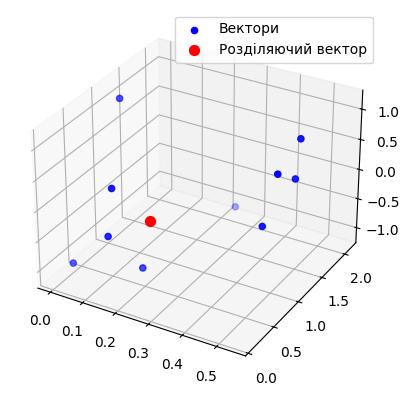

In [43]:
def visualize_3d_1(points, separator):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', marker='o', label='Вектори')
    ax.scatter(roz_vector[0], roz_vector[1], roz_vector[2], c='red', marker='o', s=50, label='Розділяючий вектор')  
    ax.legend()
    plt.show()

visualize_3d_1(vector, roz_vector)

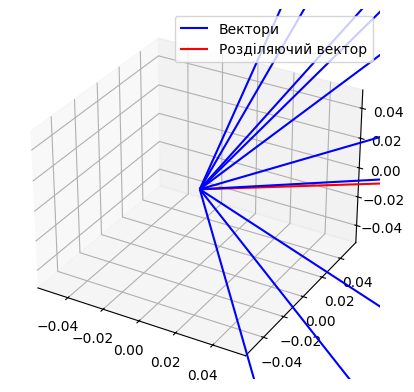

In [44]:
def visualize_3d_2(points, separator):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(0, 0, 0, points[:, 0], points[:, 1], points[:, 2], color='blue', length=1.0, normalize=True, label='Вектори')
    ax.quiver(0, 0, 0, separator[0], separator[1], separator[2], color='red', length=1.0, normalize=True, label='Розділяючий вектор') 
    ax.legend()
    plt.show()

visualize_3d_2(vector, roz_vector)